In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
#Lendo os dados com pandas 
dados = pd.read_csv("winequality-red.csv")

#exibindo os cinco primeiros do dataset
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# criando uma matriz X com os valores do data frame
X = dados.iloc[:,0:-1].values # exceto a coluna dos IDs e da classe
X.shape

(1599, 11)

In [4]:
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
X_df = pd.DataFrame(X,columns=features)
X_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [5]:
# subtraindo a média da respectiva coluna de X
X_mean = X - np.mean(X, axis=0)

In [6]:
#Step-2
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
cov = np.cov(X_mean, rowvar = False)
cov_df = pd.DataFrame(cov,columns=features)
cov_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421
1,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600
2,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815
3,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219
4,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092
5,-2.800921,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.113653,0.091592,-0.773698
6,-6.482346,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,-0.337699,0.239471,-7.209298
7,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998
8,-0.183586,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832
9,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907


In [7]:
corr = np.corrcoef(X_mean, rowvar = False)
corr_df = pd.DataFrame(corr,columns=features)
corr_df.index = features
corr_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


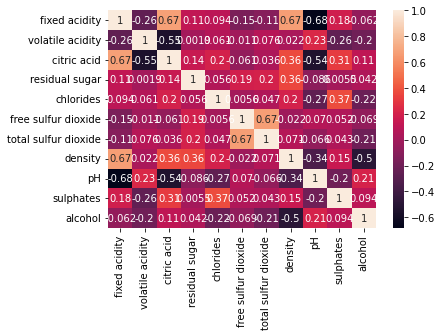

In [8]:
sns.heatmap(corr_df, annot=True)
plt.show()

In [9]:
#Step-3
autovalores, autovetores = np.linalg.eigh(cov)

In [10]:
#Step-4
sorted_index = np.argsort(autovalores)[::-1]
sorted_autovalores = autovalores[sorted_index]
sorted_autovetores = autovetores[:,sorted_index]

In [11]:
# calculando a variância explicada e a variância explicada cumulativa
total = sum(autovalores)
var_exp = [
    (i / total)*100 for i in sorted(
        autovalores, reverse=True
    )
]
cum_var_exp = np.cumsum(var_exp)

In [12]:
# visualizando as informações
print('PCA')
x = [
    'PC %s' %i for i in range(
        1,len(autovalores)+1
    )
]
df_temp = pd.DataFrame(
    {'auto-valores': autovalores,
     'cum_var_exp':cum_var_exp,
     'var_exp':var_exp,
     'Componente':x}
)
print(df_temp)

PCA
    auto-valores  cum_var_exp       var_exp Componente
0   5.614827e-07    94.657698  9.465770e+01       PC 1
1   1.454998e-03    99.494528  4.836830e+00       PC 2
2   1.007798e-02    99.753445  2.589172e-01       PC 3
3   1.134647e-02    99.905342  1.518968e-01       PC 4
4   2.319266e-02    99.992697  8.735540e-02       PC 5
5   4.139673e-02    99.996154  3.456072e-03       PC 6
6   1.046340e+00    99.998090  1.936276e-03       PC 7
7   1.819415e+00    99.999037  9.472781e-04       PC 8
8   3.101302e+00    99.999878  8.413766e-04       PC 9
9   5.793541e+01   100.000000  1.214728e-04      PC 10
10  1.133807e+03   100.000000  4.687628e-08      PC 11


In [13]:
num_components=2
A = sorted_autovetores[:,0:num_components]
X_reduced = np.dot(A.transpose() , X_mean.transpose() ).transpose()

In [14]:
df = pd.DataFrame(X_reduced, columns=['PC 1', 'PC 2'])
df['quality'] = dados['quality']

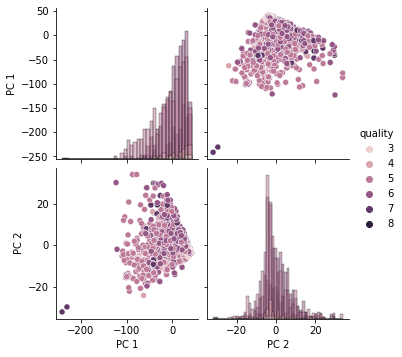

In [15]:
#Projetando com o PCA manual
sns.pairplot(
    df, vars=['PC 1', 'PC 2'], hue='quality', diag_kind="hist"
)
plt.show()

In [16]:
#Com aplicação do PCA usando a lib
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_dados = pca.fit_transform(X_mean)

In [17]:
df_pca = pd.DataFrame(pca_dados, columns=['PC 1', 'PC 2'])
df_pca['quality'] = dados['quality']